# Our Team
1. Ikhsan Fathurrahman
2. Muhammad Rafi Al-Ghifari
3. Wyne Mumtaazah Putri

dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/00236/

### Contents:

* [1 - Imports, Loading the data, and EDA](#1)
* [2 - Training, Evaluating, and Improving: Linear Models](#2)
* [3 - Training, Evaluating, and Improving: Decision Trees](#3)
* [4 - Training, Evaluating, and Improving: Random Forest](#4)
* [5 - Conclusion](#5)

## 1. Imports, Loading The Data, and EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone https://github.com/wynmmtzh/Machine-Learning-Projects.git

fatal: destination path 'Machine-Learning-Projects' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/Machine-Learning-Projects/seeds_dataset.txt', sep='\t', header=None) 

In [ ]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.columns = ['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymmetry Coefficient',
              'Length of Kernel Groove', 'Class']

In [ ]:
df

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
df.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [ ]:
df.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of Kernel           0
Width of Kernel            0
Asymmetry Coefficient      0
Length of Kernel Groove    0
Class                      0
dtype: int64

In [ ]:
df['Class'].value_counts() # the amount of each class

1    70
2    70
3    70
Name: Class, dtype: int64

All Classes are balanced already.

<AxesSubplot:>

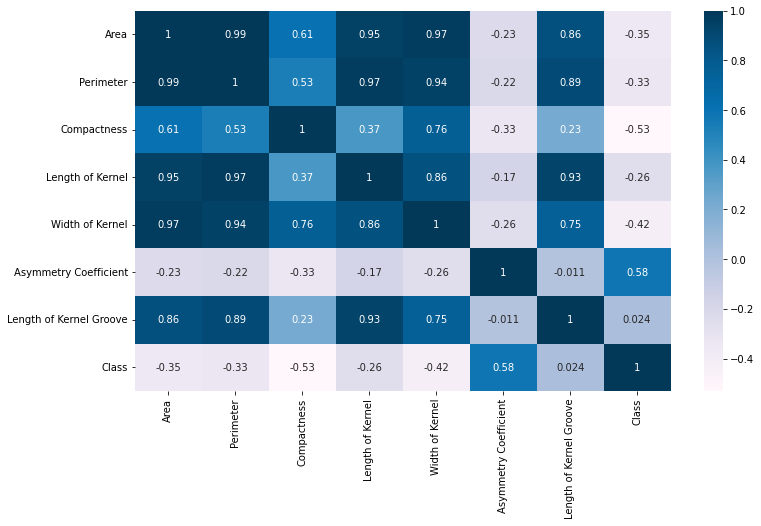

In [ ]:
# Correlation
import seaborn as sns

correlation = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(correlation, annot=True, cmap='PuBu')

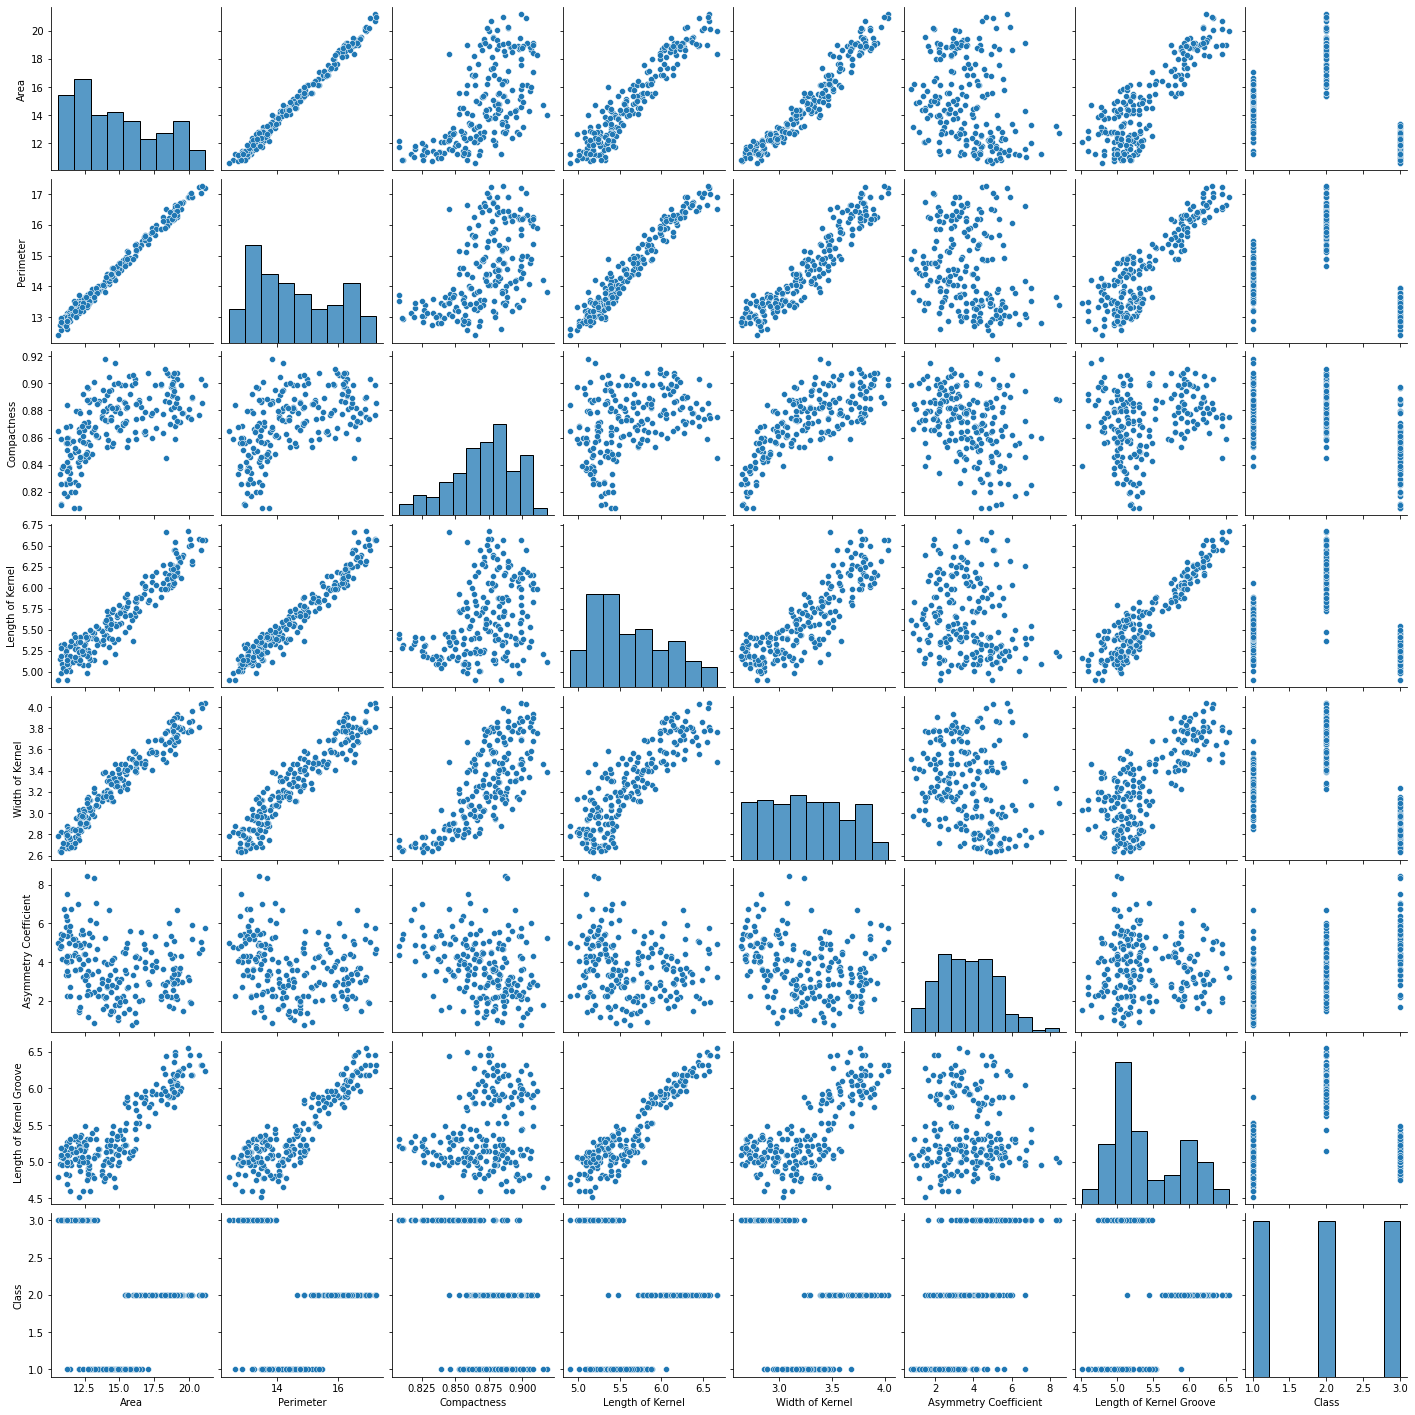

In [ ]:
# Plot pairwise relationships between variables
sns.pairplot(df, vars=['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymmetry Coefficient',
              'Length of Kernel Groove', 'Class'])


Target feature = Class (1, 2, 3)

In [ ]:
# split Data
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
X_train = train_data.drop('Class', axis = 1) # x train
y_train = train_data[['Class']] # y train

In [ ]:
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

In [ ]:
X_train.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307
96,19.31,16.59,0.8815,6.341,3.810,3.477,6.238
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045
68,14.37,14.39,0.8726,5.569,3.153,1.464,5.300
156,11.34,12.87,0.8596,5.053,2.849,3.347,5.003


In [ ]:
y_train

,Class
150,3
96,2
200,3
68,1
156,3
...,...
106,2
14,1
92,2
179,3


## 2. Training, Evaluating, and Improving: Linear Models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_model.score(X_train, y_train)

0.9464285714285714

While using `log_model.score()`, we get an accuracy of the model confidence on the training data and labels. 94.64% is not that bad. 

In [ ]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels): 
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    return acc

In [ ]:
# testing
accuracy(X_test, log_model, y_test)

0.9047619047619048

In [ ]:
# Model Evaluation: Linear
# hide warnings returned by cross validation.

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import cross_val_score

# cv is the number of subsets/folds 

log_scores = cross_val_score(log_model, X_train, y_train,
                         cv=10)

In [ ]:
log_scores

array([0.88235294, 1.        , 0.88235294, 0.94117647, 0.94117647,
       0.88235294, 1.        , 0.94117647, 1.        , 0.875     ])

In [ ]:
log_scores.mean()

0.9345588235294118

In [ ]:
# Linear Classification: Accuration

from sklearn.model_selection import cross_val_predict

# cv is the number of subsets/folds 

predictions_on_train = cross_val_predict(log_model, X_train, y_train,
                         cv=10)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, predictions_on_train)

0.9345238095238095

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, predictions_on_train))

              precision    recall  f1-score   support

           1       0.91      0.90      0.91        59
           2       0.95      0.95      0.95        56
           3       0.94      0.96      0.95        53

    accuracy                           0.93       168
   macro avg       0.93      0.94      0.94       168
weighted avg       0.93      0.93      0.93       168



### Using SGD Model

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [ ]:
sgd_clf.score(X_train, y_train)

0.8154761904761905

In [ ]:
# testing
accuracy(X_test, sgd_clf, y_test)

0.7619047619047619

In [ ]:
# Model Evaluation: SGD

from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, X_train, y_train,
                         cv=10)

In [ ]:
sgd_scores

array([0.58823529, 0.82352941, 0.76470588, 0.88235294, 0.88235294,
       0.88235294, 0.76470588, 0.82352941, 0.875     , 0.6875    ])

In [ ]:
sgd_scores.mean()

0.7974264705882352

In [ ]:
# SGD Accuration

from sklearn.model_selection import cross_val_predict

# cv is the number of subsets/folds 

predictions_on_train2 = cross_val_predict(sgd_clf, X_train, y_train,
                         cv=10)

In [ ]:
accuracy_score(y_train, predictions_on_train2)

0.7797619047619048

## 3. Training, Evaluating, and Improving: Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    
    """
    
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)
    
    return cm

In [ ]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    
    """
    
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)
    
    return report

In [ ]:
accuracy(X_train, tree_clf, y_train)

1.0

Model is overfit.

In [ ]:
# Confusion Matrix
conf_matrix(X_train, tree_clf, y_train)

array([[59,  0,  0],
       [ 0, 56,  0],
       [ 0,  0, 53]])

In [ ]:
class_report(X_train, tree_clf, y_train)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        53

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



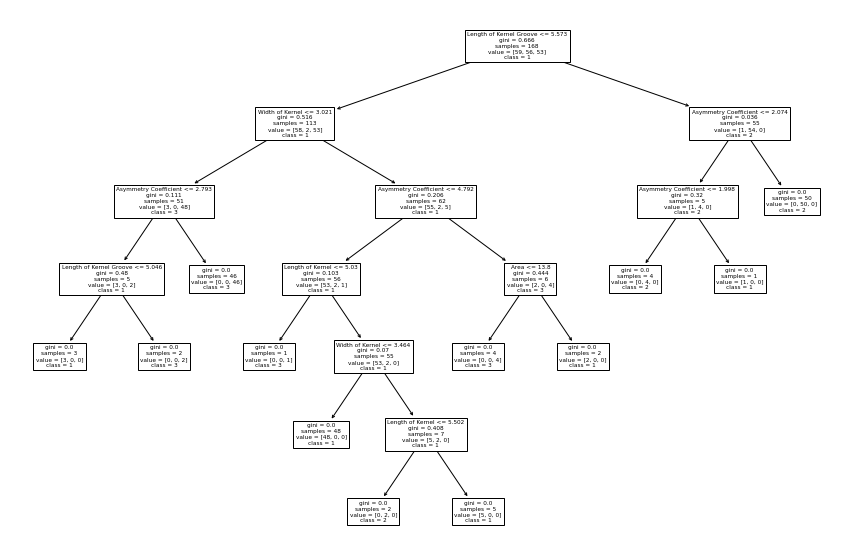

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree_clf, feature_names=train_data.columns, class_names=['1', '2', '3']);

In [ ]:
# improving decision trees

tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Model Evaluation
# hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)), 
               'min_samples_split': [0,1,2, 3, 4], 
               'min_samples_leaf': [0,1,2, 3, 4], 
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 1,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 1}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features=1, max_leaf_nodes=3,
                       min_samples_split=1, random_state=42)

In [ ]:
tree_best = grid_search.best_estimator_

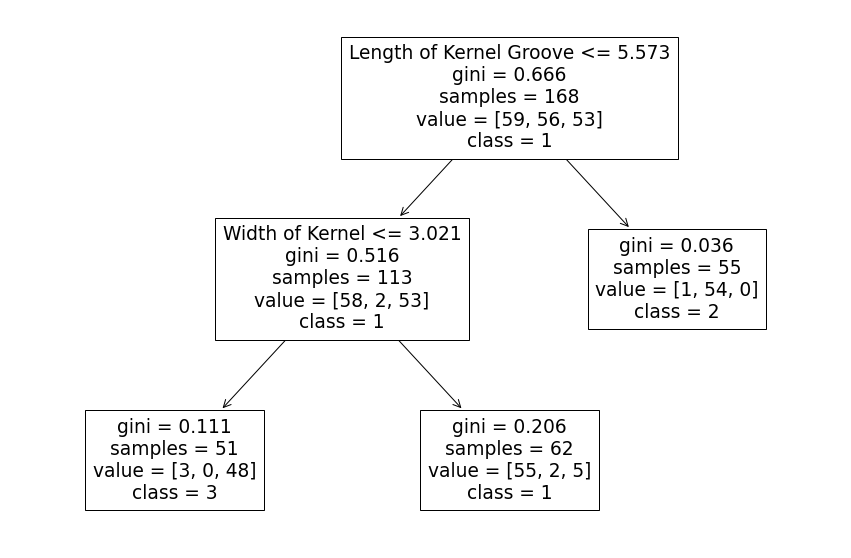

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree_best, feature_names=train_data.columns, class_names=['1', '2', '3']);

In [ ]:
accuracy(X_train, tree_best, y_train)

0.9345238095238095

In [ ]:
conf_matrix(X_train, tree_best, y_train)

array([[55,  1,  3],
       [ 2, 54,  0],
       [ 5,  0, 48]])

In [ ]:
class_report(X_train, tree_best, y_train)

              precision    recall  f1-score   support

           1       0.89      0.93      0.91        59
           2       0.98      0.96      0.97        56
           3       0.94      0.91      0.92        53

    accuracy                           0.93       168
   macro avg       0.94      0.93      0.94       168
weighted avg       0.94      0.93      0.93       168



The model is finally not overfit.

In [ ]:
# Data test Evaluation
accuracy(X_test, tree_best, y_test)

0.8095238095238095

In [ ]:
conf_matrix(X_test, tree_best, y_test)

array([[ 8,  0,  3],
       [ 0, 14,  0],
       [ 5,  0, 12]])

In [ ]:
class_report(X_test, tree_best, y_test)

              precision    recall  f1-score   support

           1       0.62      0.73      0.67        11
           2       1.00      1.00      1.00        14
           3       0.80      0.71      0.75        17

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.82      0.81      0.81        42



## 4. Training, Evaluating, and Improving: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(min_samples_split=2,bootstrap=False, max_depth=None, random_state=42,n_jobs=-1, max_features='sqrt')

forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
accuracy(X_train, forest_clf, y_train)

1.0

Model is overfit.

In [ ]:
conf_matrix(X_train, forest_clf, y_train)

array([[59,  0,  0],
       [ 0, 56,  0],
       [ 0,  0, 53]])

In [ ]:
class_report(X_train, forest_clf, y_train)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        53

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



In [ ]:
# Improving the model

forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'n_estimators':[100,200,300,500],
    'max_leaf_nodes':list(range(0,10)),
    'min_samples_leaf': [0,1,2,3,4]}
 
# refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(RandomForestClassifier(bootstrap=False,class_weight='balanced', n_jobs=-1, max_features='sqrt'), params_grid, verbose=1, cv=3)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'n_estimators': 300}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_leaf_nodes=8, n_estimators=300, n_jobs=-1)

In [ ]:
forest_best = grid_search.best_estimator_

In [ ]:
accuracy(X_train, forest_best, y_train)

0.9761904761904762

In [ ]:
conf_matrix(X_train, forest_best, y_train)

array([[57,  1,  1],
       [ 2, 54,  0],
       [ 0,  0, 53]])

In [ ]:
class_report(X_train, forest_best, y_train)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        59
           2       0.98      0.96      0.97        56
           3       0.98      1.00      0.99        53

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



The model is not overfit.

In [ ]:
# Data Test Evaluation
accuracy(X_test, forest_best, y_test)

0.8809523809523809

In [ ]:
conf_matrix(X_test, forest_best, y_test)

array([[ 9,  0,  2],
       [ 0, 14,  0],
       [ 3,  0, 14]])

In [ ]:
class_report(X_test, forest_best, y_test)

              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       1.00      1.00      1.00        14
           3       0.88      0.82      0.85        17

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



The best model for this classification is Random Forest, because the accurracy score for this model is not overfit, and the error score between train and test is kind of similar.